In [1]:
# 버전 확인
import sklearn

print(sklearn.__version__)

1.0


## 프로젝트 1 : 손글씨 분류

### 라이브러리 호출

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### 데이터 준비

In [97]:
digits = load_digits()

### 데이터 이해하기

In [98]:
# Feature / Label Data 지정
digits_data = digits.data
digits_label = digits.target

In [99]:
# Target Names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
# target 데이터 각 클래스 샘플 수 출력
class_counts = np.bincount(digits.target)
class_counts

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

target 데이터는 0, 1, 2, 3, 4, 5, 6, 7, 8, 9로 이루어져 있고, 각 클래스별 샘플 수는 균형적으로 분포되어 있는 편이다. 따라서, 추후 모델 성능 평가를 진행할 때 정확도(Accuracy)를 사용해도 될 것 같다.

In [101]:
# 데이터 Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### train/test 데이터 분리

In [102]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, # train data
                                                    digits_label, # test data
                                                    test_size=0.2, # train/test 비율 8:2
                                                    random_state=7) # 데이터 섞기

In [103]:
# 각 데이터 형태 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


### 다양한 모델 학습

- Decision Tree

In [104]:
decision_tree = DecisionTreeClassifier(random_state=32) # 모델 생성
decision_tree.fit(X_train, y_train) # 훈련
dt_y_pred = decision_tree.predict(X_test) # 예측

print(classification_report(y_test, dt_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



- Random Forest

In [105]:
random_forest = RandomForestClassifier(random_state=32) # 모델 생성
random_forest.fit(X_train, y_train) # 훈련
rf_y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, rf_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



- SVM

In [106]:
svm_model = svm.SVC() # 모델 생성
svm_model.fit(X_train, y_train) # 훈련
svm_y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, svm_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



- SGD Classifier

In [107]:
sgd_model = SGDClassifier() # 모델 생성
sgd_model.fit(X_train, y_train) # 훈련
sgd_y_pred = sgd_model.predict(X_test) # 예측

print(classification_report(y_test, sgd_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.94      0.79      0.86        42
           2       1.00      1.00      1.00        40
           3       0.94      0.88      0.91        34
           4       0.92      0.97      0.95        37
           5       0.93      0.96      0.95        28
           6       0.96      0.89      0.93        28
           7       0.97      0.88      0.92        33
           8       0.78      0.93      0.85        43
           9       0.89      0.97      0.93        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



- Logistic Regression

In [108]:
logistic_model = LogisticRegression() # 모델 생성
logistic_model.fit(X_train, y_train) # 훈련
lr_y_pred = logistic_model.predict(X_test) # 예측

print(classification_report(y_test, lr_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### 모델 평가

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

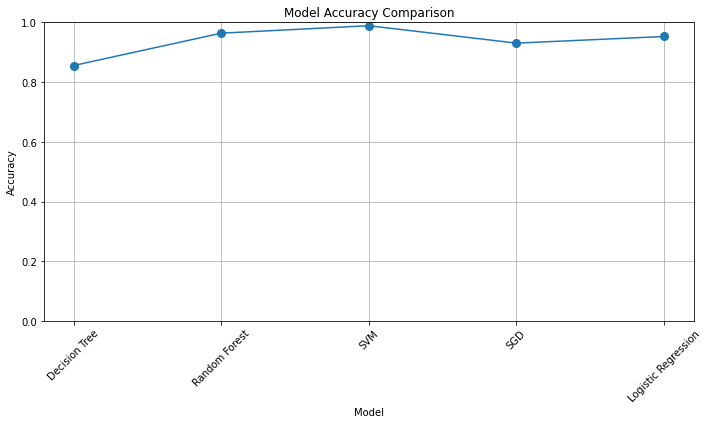

In [109]:
# 각 모델 학습 및 정확도 측정
models = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
model_names = ["Decision Tree", "Random Forest", "SVM", "SGD", "Logistic Regression"]
digits_accuracies = [] # 정확도 저장 리스트 생성

for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
    digits_accuracies.append(accuracy) # 정확도 추가
    
# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(model_names, digits_accuracies, marker='o', linestyle='-', markersize=8)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(True) # 그리드 표시
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

손글씨 분류 데이터의 target 데이터 클래스 간 분포를 확인한 결과, 균형이 있는 편이었다. 그래서 모델 성능 지표로 정확도를 선택했다. 각 모델 별 정확도를 시각화한 결과, SVM 모델의 정확도가 가장 높게 나타났다. 

## 프로젝트 2 : 와인 분류

### 라이브러리 호출

In [110]:
# 다른 라이브러리는 첫 줄에서 호출했으므로 생략
from sklearn.datasets import load_wine

### 데이터 준비

In [111]:
wine = load_wine()

### 데이터 이해하기

In [112]:
# Feature / Label Data 지정
wine_data = wine.data
wine_label = wine.target

In [113]:
# Target Names 출력
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [114]:
# target 데이터 각 클래스 샘플 수 출력
class_counts = np.bincount(wine.target)
class_counts

array([59, 71, 48])

클래스 간의 분포가 약간 불균형한 것 같다. 이처럼 클래스 간의 불균형이 있는 경우 정확도보다는 정밀도(Precision)나 재현율(Recall) 또는 정밀도와 재현율의 조화 평균인 F1-Score 지표를 사용하는 것이 좋을 것 같다.

In [115]:
# 데이터 Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### train/test 데이터 분리

In [116]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, # train data
                                                    wine_label, # test data
                                                    test_size=0.2, # train/test 비율 8:2
                                                    random_state=7) # 데이터 섞기

In [117]:
# 각 데이터 형태 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


### 다양한 모델 학습

- Decision Tree

In [118]:
decision_tree = DecisionTreeClassifier(random_state=32) # 모델 생성
decision_tree.fit(X_train, y_train) # 훈련
dt_y_pred = decision_tree.predict(X_test) # 예측

print(classification_report(y_test, dt_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



- Random Forest

In [119]:
random_forest = RandomForestClassifier(random_state=32) # 모델 생성
random_forest.fit(X_train, y_train) # 훈련
rf_y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, rf_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



- SVM

In [120]:
svm_model = svm.SVC() # 모델 생성
svm_model.fit(X_train, y_train) # 훈련
svm_y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, svm_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



- SGD Classifier

In [121]:
sgd_model = SGDClassifier() # 모델 생성
sgd_model.fit(X_train, y_train) # 훈련
sgd_y_pred = sgd_model.predict(X_test) # 예측

print(classification_report(y_test, sgd_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.28      1.00      0.44         7
           1       0.91      0.59      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.47        36
   macro avg       0.40      0.53      0.38        36
weighted avg       0.48      0.47      0.42        36



- Logistic Regression

In [122]:
logistic_model = LogisticRegression() # 모델 생성
logistic_model.fit(X_train, y_train) # 훈련
lr_y_pred = logistic_model.predict(X_test) # 예측

print(classification_report(y_test, lr_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



### 모델 평가

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

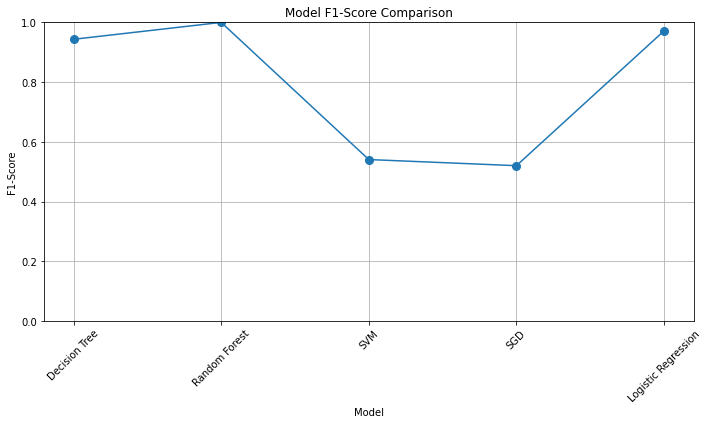

In [123]:
# 각 모델 학습 및 정확도 측정
models = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
model_names = ["Decision Tree", "Random Forest", "SVM", "SGD", "Logistic Regression"]
wine_f1 = [] # 정확도 저장 리스트 생성

for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    report = classification_report(y_test, y_pred, output_dict = True)
    wine_f1_score = report['weighted avg']['f1-score']
    wine_f1.append(wine_f1_score) # 정확도 추가
    
# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(model_names, wine_f1, marker='o', linestyle='-', markersize=8)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.grid(True) # 그리드 표시
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

wine 데이터의 target 데이터 클래스 간 분포를 확인한 결과, 클래스가 불균형한 편이었다. 그래서 모델 성능 지표로 f1-score를 선택했다. f1-score는 1에 가까울수록 모델이 매우 우수한 성능을 보임을 의미한다. 시각화 결과, f1-score가 가장 높은 모델은 Random Forest 이다.

## 프로젝트 3 : 유방암 여부 진단

### 라이브러리 호출

In [124]:
# 다른 라이브러리는 첫 줄에서 호출했으므로 생략
from sklearn.datasets import load_breast_cancer

### 데이터 준비

In [125]:
breast_cancer = load_breast_cancer()

### 데이터 이해하기

In [126]:
# Feature / Label Data 지정
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [127]:
# Target Names 출력
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [128]:
# target 데이터 각 클래스 샘플 수 출력
class_counts = np.bincount(breast_cancer.target)
class_counts

array([212, 357])

클래스 간의 분포가 약간 불균형한 것 같다.

In [129]:
# 데이터 Describe
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### train/test 데이터 분리

In [130]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, # train data
                                                    breast_cancer_label, # test data
                                                    test_size=0.2, # train/test 비율 8:2
                                                    random_state=7) # 데이터 섞기

In [131]:
# 각 데이터 형태 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### 다양한 모델 학습

- Decision Tree

In [132]:
decision_tree = DecisionTreeClassifier(random_state=32) # 모델 생성
decision_tree.fit(X_train, y_train) # 훈련
dt_y_pred = decision_tree.predict(X_test) # 예측

print(classification_report(y_test, dt_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



- Random Forest

In [133]:
random_forest = RandomForestClassifier(random_state=32) # 모델 생성
random_forest.fit(X_train, y_train) # 훈련
rf_y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, rf_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



- SVM

In [134]:
svm_model = svm.SVC() # 모델 생성
svm_model.fit(X_train, y_train) # 훈련
svm_y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, svm_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



- SGD Classifier

In [135]:
sgd_model = SGDClassifier() # 모델 생성
sgd_model.fit(X_train, y_train) # 훈련
sgd_y_pred = sgd_model.predict(X_test) # 예측

print(classification_report(y_test, sgd_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        40
           1       0.89      0.97      0.93        74

    accuracy                           0.90       114
   macro avg       0.91      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114



- Logistic Regression

In [136]:
logistic_model = LogisticRegression() # 모델 생성
logistic_model.fit(X_train, y_train) # 훈련
lr_y_pred = logistic_model.predict(X_test) # 예측

print(classification_report(y_test, lr_y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



### 모델 평가

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

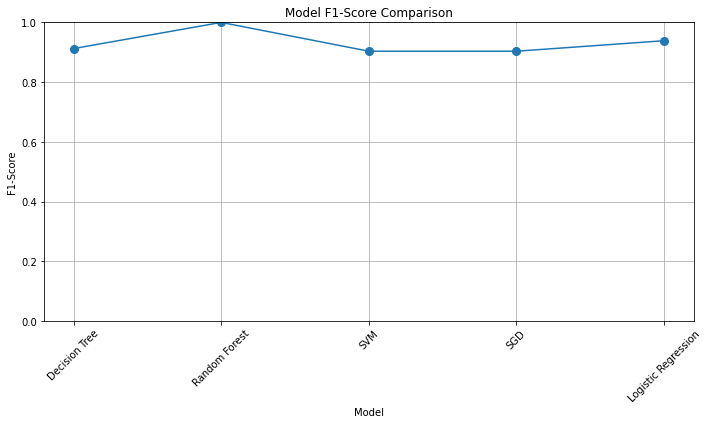

In [137]:
# 각 모델 학습 및 정확도 측정
models = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
model_names = ["Decision Tree", "Random Forest", "SVM", "SGD", "Logistic Regression"]
cancer_f1 = [] # 정확도 저장 리스트 생성

for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    report = classification_report(y_test, y_pred, output_dict = True)
    cancer_f1_score = report['weighted avg']['f1-score']
    cancer_f1.append(cancer_f1_score) # 정확도 추가
    
# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(model_names, cancer_recall, marker='o', linestyle='-', markersize=8)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.grid(True) # 그리드 표시
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

유방암 데이터의 target 데이터 클래스 간 분포를 확인한 결과, 클래스가 불균형한 편이었다. 그래서 모델 성능 지표로 f1-score를 선택했다. f1-score는 1에 가까울수록 모델이 매우 우수한 성능을 보임을 의미한다. 시각화 결과, f1-score가 가장 높은 모델은 Random Forest 이다.

## 회고

### 어려웠던 점 / 느낀점
> - 이번 프로젝트는 여러 데이터에 다양한 분류 모델을 각각 적용시키고 모델 성능을 평가했다. 프로젝트를 하면서서 크게 어려웠던 점은 없었으나, 모델 성능을 평가할 때 사용할 지표를 선택하는 것이 조금 어려웠다. 특히, 오차 행렬에서 예측 결과를 네 가지로 구분하는데 각각 개념을 완벽하게 이해하고 암기하려고 하는 점이 살짝 힘들었다. 하지만 모델 성능 평가는 가장 중요하기 때문에 해당 내용은 완벽하게 숙지를 해야할 것 같다.  


### 학습한 내용
> - 평소에 Random Forest 모델을 자주 사용했었는데, 이번 프로젝트를 통해 그 외에 다양한 분류 모델을 사용해봤다. 각 모델이 어떤 원리로 동작하는지 완전히 알지는 못하지만 Random Forest 모델이 대체적으로 우수한 성능을 보이는 것을 확인했다. 그래서 예전에 이런 글을 봤는데.. 'Random Forest는 빈 깡통 모델이어도 성능이 괜찮다'라는 말에 공감이 갔다.
> - 데이터 분석의 마지막 단계(?)인 모델링 단계의 전체적인 흐름을 파악할 수 있었다. 모델을 돌리기 위해 데이터를 어떻게 준비하는지부터 모델 성능을 평가하는지 까지의 코드 흐름을 파악하는 데 도움이 많이 됐다. 어떤 데이터를 사용하든, 어떤 모델을 사용하든 그 흐름은 비슷하다는 것을 깨달았다. 여기서 달라진다면... 하이퍼 파라미터 튜닝이나 교차 검증 등을 추가할 수 있을 것 같다.

## 참고
- https://blog.naver.com/fbfbf1/222453580598